In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

c:\users\deepasistla\appdata\local\programs\python\python36\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "c:\users\deepasistla\appdata\local\programs\python\python36\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\users\deepasistla\appdata\local\programs\python\python36\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "c:\users\deepasistla\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "c:\users\deepasistla\appdata\local\programs\python\python36\lib\site-packages\traitlets\config\application.py", line 658, 

In [5]:
titanic=pd.read_excel('titanic.xls')
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [6]:
titanic.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [7]:
titanic.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [8]:
titanic_cat=titanic[['name','sex','ticket','cabin','embarked','home.dest','boat']]

In [9]:
titanic_num=titanic.select_dtypes(['float64','int64'])

In [10]:
titanic_num.head()

,pclass,survived,age,sibsp,parch,fare,body
0,1,1,29.0000,0,0,211.3375,NaN
1,1,1,0.9167,1,2,151.5500,NaN
2,1,0,2.0000,1,2,151.5500,NaN
3,1,0,30.0000,1,2,151.5500,135.0
4,1,0,25.0000,1,2,151.5500,NaN


In [11]:
titanic_num.isnull().sum()

pclass         0
survived       0
age          263
sibsp          0
parch          0
fare           1
body        1188
dtype: int64

In [12]:
# Missing Value Imputations-
def missing(x):
    x=x.fillna(x.median())
    return x

In [13]:
titanic_num=titanic_num.apply(missing)

In [14]:
#Outliers
def outliers(x):
    x=x.clip_upper(x.quantile(0.99))
    x=x.clip_lower(x.quantile(0.01))
    return(x)

In [15]:
titanic_num=titanic_num.apply(outliers)

In [16]:
titanic_num.isnull().sum()

pclass      0
survived    0
age         0
sibsp       0
parch       0
fare        0
body        0
dtype: int64

In [17]:
titanic_num=titanic_num.drop(columns=['pclass'])

In [18]:
titanic_num.head()

,survived,age,sibsp,parch,fare,body
0,1.0,29.0,0.0,0.0,211.3375,155.0
1,1.0,1.0,1.0,2.0,151.5500,155.0
2,0.0,2.0,1.0,2.0,151.5500,155.0
3,0.0,30.0,1.0,2.0,151.5500,135.0
4,0.0,25.0,1.0,2.0,151.5500,155.0


In [19]:
titanic_cat.isnull().sum()

name            0
sex             0
ticket          0
cabin        1014
embarked        2
home.dest     564
boat          823
dtype: int64

In [20]:
titanic_cat1=titanic_cat.copy(deep=True)

In [21]:
titanic_cat1=titanic_cat1.drop(columns=['name','home.dest','cabin','boat','ticket'])

In [22]:
titanic_cat1.isnull().sum()

sex         0
embarked    2
dtype: int64

In [23]:
titanic_cat1['embarked'].fillna('U', inplace=True)

In [24]:
titanic_cat1.isnull().sum()

sex         0
embarked    0
dtype: int64

In [25]:
titanic_cat1['pclass']=titanic['pclass']

In [26]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [27]:
for c_feature in titanic_cat1:
    titanic_cat1 = create_dummies( titanic_cat1, c_feature )

In [28]:
titanic_cat1.head()

,sex_male,embarked_Q,embarked_S,embarked_U,pclass_2,pclass_3
0,0,0,1,0,0,0
1,1,0,1,0,0,0
2,0,0,1,0,0,0
3,1,0,1,0,0,0
4,0,0,1,0,0,0


In [29]:
titanic_df=pd.concat([titanic_num,titanic_cat1],axis=1)

In [30]:
titanic_df.head()

,survived,age,sibsp,parch,fare,body,sex_male,embarked_Q,embarked_S,embarked_U,pclass_2,pclass_3
0,1.0,29.0,0.0,0.0,211.3375,155.0,0,0,1,0,0,0
1,1.0,1.0,1.0,2.0,151.5500,155.0,1,0,1,0,0,0
2,0.0,2.0,1.0,2.0,151.5500,155.0,0,0,1,0,0,0
3,0.0,30.0,1.0,2.0,151.5500,135.0,1,0,1,0,0,0
4,0.0,25.0,1.0,2.0,151.5500,155.0,0,0,1,0,0,0


In [31]:
titanic_df['cabin']=titanic['cabin']

In [32]:
titanic_df.head()

,survived,age,sibsp,parch,fare,body,sex_male,embarked_Q,embarked_S,embarked_U,pclass_2,pclass_3,cabin
0,1.0,29.0,0.0,0.0,211.3375,155.0,0,0,1,0,0,0,B5
1,1.0,1.0,1.0,2.0,151.5500,155.0,1,0,1,0,0,0,C22 C26
2,0.0,2.0,1.0,2.0,151.5500,155.0,0,0,1,0,0,0,C22 C26
3,0.0,30.0,1.0,2.0,151.5500,135.0,1,0,1,0,0,0,C22 C26
4,0.0,25.0,1.0,2.0,151.5500,155.0,0,0,1,0,0,0,C22 C26


In [33]:
titanic_df['cabin'].fillna('Unknown', inplace=True)

In [34]:
titanic_df['boat']=titanic['boat']

In [35]:
titanic_df['boat'].fillna('U', inplace=True)

In [36]:
titanic_df['ticket']=titanic['ticket']

In [37]:
titanic_df['ticket'].fillna('Unknown',inplace=True)

In [38]:
titanic_df['ticket'] = titanic_df['ticket'].replace('.', '')
titanic_df['ticket'] = titanic_df['ticket'].replace('/', '')

In [39]:
titanic_df.isnull().sum()

survived      0
age           0
sibsp         0
parch         0
fare          0
body          0
sex_male      0
embarked_Q    0
embarked_S    0
embarked_U    0
pclass_2      0
pclass_3      0
cabin         0
boat          0
ticket        0
dtype: int64

In [40]:
titanic_df_corr=titanic_df.corr()

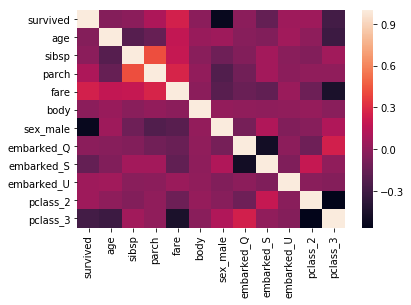

In [41]:
sns.heatmap(titanic_df_corr)

In [42]:
#Splitting the data
titanic_columns = titanic_df.columns.difference( ['survived','ticket','cabin','boat'] )

In [43]:
titanic_df.dtypes

survived      float64
age           float64
sibsp         float64
parch         float64
fare          float64
body          float64
sex_male        uint8
embarked_Q      uint8
embarked_S      uint8
embarked_U      uint8
pclass_2        uint8
pclass_3        uint8
cabin          object
boat           object
ticket         object
dtype: object

In [44]:
titanic_columns

Index(['age', 'body', 'embarked_Q', 'embarked_S', 'embarked_U', 'fare',
       'parch', 'pclass_2', 'pclass_3', 'sex_male', 'sibsp'],
      dtype='object')

In [143]:
from sklearn.cross_validation import train_test_split
train_X, test_X, train_y, test_y = train_test_split( titanic_df[titanic_columns],
                                                  titanic_df['survived'],
                                                  test_size = 0.3,
                                                  random_state = 30 )

In [144]:
import sklearn.tree as dt
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export
from sklearn.grid_search import GridSearchCV

## Decision Tree

In [145]:
clf_tree = DecisionTreeClassifier( max_depth = 3 )
clf_tree.fit( train_X, train_y )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [146]:
tree_train_pred = pd.DataFrame( { 'actual':  train_y,
                            'predicted': clf_tree.predict( train_X ) } )

In [147]:
tree_train_pred.head(3)

,actual,predicted
1028,1.0,0.0
152,1.0,0.0
1294,0.0,0.0


In [148]:
tree_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': clf_tree.predict( test_X ) } )

In [149]:
tree_test_pred.head(3)

,actual,predicted
659,1.0,1.0
338,0.0,0.0
610,0.0,1.0


In [150]:
metrics.accuracy_score( tree_train_pred.actual, tree_train_pred.predicted )

0.8122270742358079

In [151]:
metrics.accuracy_score( tree_test_pred.actual, tree_test_pred.predicted )

0.8193384223918575

In [152]:
train_y.value_counts()

0.0    562
1.0    354
Name: survived, dtype: int64

In [153]:
param_grid = {'max_depth': np.arange(3, 11),
             'max_features': np.arange(3,11)}

In [154]:
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 10)
tree.fit( train_X, train_y )

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10]), 'max_features': array([ 3,  4,  5,  6,  7,  8,  9, 10])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [155]:
tree.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=9, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [156]:
tree.best_params_

{'max_depth': 3, 'max_features': 9}

In [157]:
tree.best_score_

0.8024017467248908

In [158]:
clf_tree = DecisionTreeClassifier( max_depth = 3, max_features=9 )
clf_tree.fit( train_X, train_y )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=9, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [159]:
clf_tree.feature_importances_

array([0.05047869, 0.01999534, 0.        , 0.        , 0.        ,
       0.06686335, 0.        , 0.        , 0.19554435, 0.66711827,
       0.        ])

In [160]:
clf_tree.predict(train_X)

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1.,
       1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1.,
       1., 0., 1., 0., 0.

In [161]:
train_X.columns

Index(['age', 'body', 'embarked_Q', 'embarked_S', 'embarked_U', 'fare',
       'parch', 'pclass_2', 'pclass_3', 'sex_male', 'sibsp'],
      dtype='object')

In [162]:
feature_imp=pd.concat([pd.DataFrame(train_X.columns),pd.DataFrame(clf_tree.feature_importances_)],axis=1)

In [163]:
feature_imp.columns=['Feature','Relative_Importance']

In [164]:
feature_imp=feature_imp.sort_values('Relative_Importance',ascending=False)

In [165]:
feature_imp

,Feature,Relative_Importance
9,sex_male,0.667118
8,pclass_3,0.195544
5,fare,0.066863
0,age,0.050479
1,body,0.019995
2,embarked_Q,0.000000
3,embarked_S,0.000000
4,embarked_U,0.000000
6,parch,0.000000
7,pclass_2,0.000000


In [166]:
tree_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': clf_tree.predict( test_X ) } )

In [167]:
tree_test_pred.sample( n = 10 )

,actual,predicted
446,1.0,1.0
1303,0.0,0.0
57,1.0,1.0
600,0.0,0.0
799,0.0,0.0
1093,0.0,0.0
1069,0.0,0.0
839,0.0,0.0
730,0.0,0.0
1045,0.0,0.0


In [168]:
metrics.accuracy_score( tree_test_pred.actual, tree_test_pred.predicted )

0.811704834605598

## Random Forest

In [169]:
from sklearn.ensemble import RandomForestClassifier

In [170]:
radm_clf = RandomForestClassifier(max_depth = 3,n_estimators=100)
radm_clf.fit( train_X, train_y )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [171]:
radm_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': radm_clf.predict( test_X ) } )

In [172]:
metrics.accuracy_score( radm_test_pred.actual, radm_test_pred.predicted )

0.806615776081425

In [173]:
radm_train_pred = pd.DataFrame( { 'actual':  train_y,
                            'predicted': radm_clf.predict( train_X ) } )

In [174]:
metrics.accuracy_score( radm_train_pred.actual, radm_train_pred.predicted )

0.8111353711790393

In [175]:
param_grid = {'max_depth': np.arange(3, 11),
             'max_features': np.arange(3,11)}

In [176]:
ran_forest = GridSearchCV(RandomForestClassifier(), param_grid, cv = 10)
ran_forest.fit( train_X, train_y )

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10]), 'max_features': array([ 3,  4,  5,  6,  7,  8,  9, 10])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [177]:
ran_forest.best_score_

0.8111353711790393

In [178]:
ran_forest.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features=7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [179]:
ran_forest.best_params_

{'max_depth': 6, 'max_features': 7}

In [180]:
ran_forest = RandomForestClassifier( max_depth = 6, max_features=7 )
ran_forest.fit( train_X, train_y )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features=7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [181]:
radm_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': ran_forest.predict( test_X ) } )

In [182]:
metrics.accuracy_score( radm_test_pred.actual, radm_test_pred.predicted )

0.8346055979643766